In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Bootstrap review: Santa Barbara County Salaries in 2020

[Government Compensation in California](https://publicpay.ca.gov/Reports/Counties/County.aspx?entityid=42&year=2020)
Let's look at how much Santa Barbara County employees got paid in 2020.

In [11]:
sb_pop = Table.read_table('data/santabarbara-county-salaries-2020.csv').where('TotalWages', are.above(10000))
sb_pop = sb_pop.where('TotalWages', are.above(10*40*52))#.sort('TotalWages')
pop_median = percentile(50, sb_pop.column('TotalWages'))
print("Population median is $", pop_median)

our_sample = sb_pop.sample(300, with_replacement = False)
#sb_pop.sort('TotalWages', descending = True)
#percentile(50, our_sample.column('TotalWages'))
sb_pop.num_rows

Population median is $ 77666


4292

In [12]:
def one_bootstrap_median():
    single_sample = our_sample.sample(300, with_replacement = True)
    return percentile(50, single_sample.column('TotalWages'))

med_bins = np.arange(50000, 100001, 2500)
med_bins

array([ 50000,  52500,  55000,  57500,  60000,  62500,  65000,  67500,
        70000,  72500,  75000,  77500,  80000,  82500,  85000,  87500,
        90000,  92500,  95000,  97500, 100000])

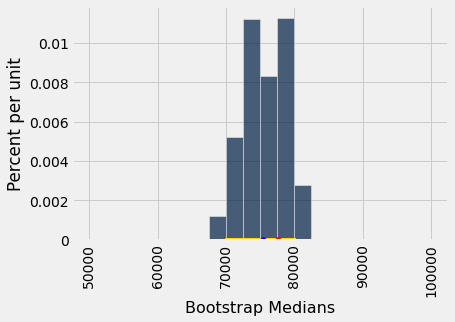

In [14]:
## Let's do the whole process, all at once: 
## 1. take a sample, 

our_sample = sb_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('TotalWages'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(400):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0,0], color="gold",lw=4, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

## Bootstrap Review: Mean Maternal Age

In [ ]:
births = Table.read_table('data/baby.csv')
births.show(5)

In [ ]:
births.hist('Maternal Age')

In [ ]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

In [ ]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [15]:
values = make_array(2, 3, 3, 9)

In [16]:
sum(values)/len(values)

4.25

In [17]:
np.average(values)

4.25

In [18]:
np.mean(values)

4.25

In [19]:
(2 + 3 + 3 + 9)/4

4.25

In [20]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [21]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


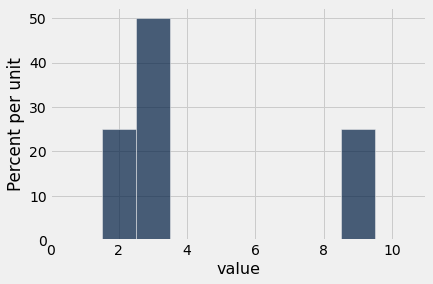

In [22]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [23]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

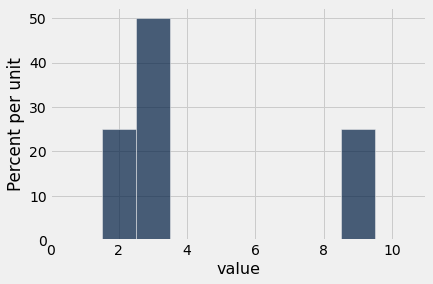

In [24]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [25]:
np.average(values)

4.25

In [26]:
np.average(new_vals)

4.25

In [27]:
my_small_set = (0, 1, 2)

In [28]:
np.average(my_small_set)

1.0

In [29]:
np.median(my_small_set)

1.0

In [36]:
my_small_set = (-98, 1, 100)

In [37]:
np.median(my_small_set)

1.0

In [38]:
np.average(my_small_set)

1.0

### Discussion Question

In [39]:
nba = Table.read_table('data/nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


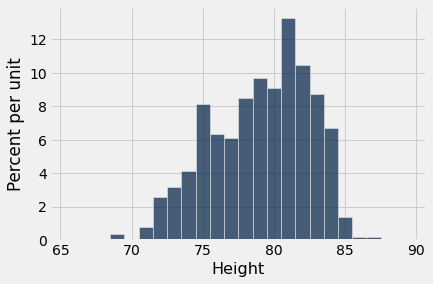

In [40]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [41]:
heights = nba.column('Height')
percentile(50, heights)

80

In [42]:
np.average(heights)

79.06534653465347

## Standard Deviation ##

In [43]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [44]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [45]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [46]:
sum(deviations)

0.0

In [47]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [48]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [49]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [50]:
np.std(values)

2.7726341266023544

In [ ]:
# The standard deviation (distance) from the average is 2.77 units.

# this means one standard unit from the average of 4.25, is 2.77 units.
# +- 2.77 units from 4.25, this captures one SD away from the average